In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\Misc\\Programming\\Machine & Deep Learning\\Deep Learning\\Sample Data\\Heart Failure Data.csv")
data.shape

(299, 13)

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Data Analysis

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

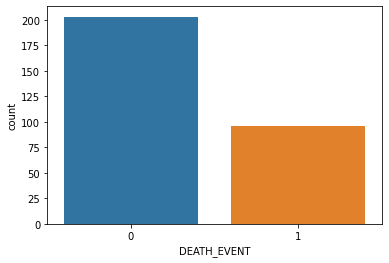

In [5]:
sns.countplot(x = data.DEATH_EVENT)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

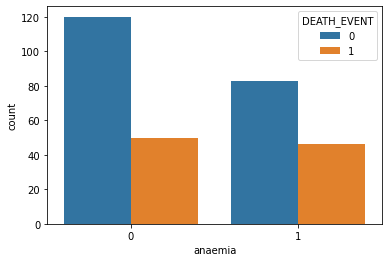

In [6]:
sns.countplot(x = data.anaemia,hue = data.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

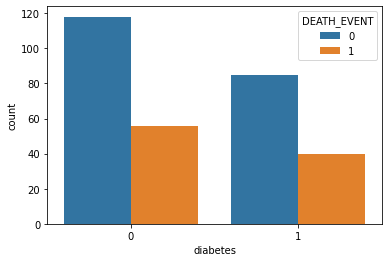

In [7]:
sns.countplot(x = data.diabetes, hue = data.DEATH_EVENT)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

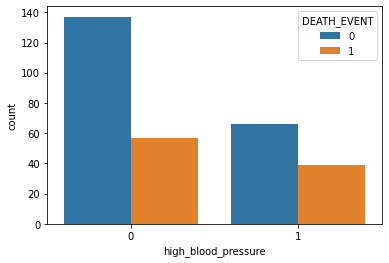

In [8]:
sns.countplot(x = data.high_blood_pressure, hue = data.DEATH_EVENT)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '40.0'),
  Text(1, 0, '41.0'),
  Text(2, 0, '42.0'),
  Text(3, 0, '43.0'),
  Text(4, 0, '44.0'),
  Text(5, 0, '45.0'),
  Text(6, 0, '46.0'),
  Text(7, 0, '47.0'),
  Text(8, 0, '48.0'),
  Text(9, 0, '49.0'),
  Text(10, 0, '50.0'),
  Text(11, 0, '51.0'),
  Text(12, 0, '52.0'),
  Text(13, 0, '53.0'),
  Text(14, 0, '54.0'),
  Text(15, 0, '55.0'),
  Text(16, 0, '56.0'),
  Text(17, 0, '57.0'),
  Text(18, 0, '58.0'),
  Text(19, 0, '59.0'),
  Text(20, 0, '60.0'),
  Text(21, 0, '60.667'),
  Text(22, 0, '61.0'),
  Text(23, 0, '62.0'),
  Text(24, 0, '63.0'),
  Text(25, 0, '64.0'),
  Text(26, 0, '65.0'),
  Text(27, 0, '66.0'),
  Text(28, 0, '67.0'),
  Text(29, 0, '68.0'),
  Text(30, 0, '69.0'),
  Text(31, 0, '70.0'),
  Text(32, 0, '72.0'),
  Text(33, 0, '73.0'),
  Text(34, 0

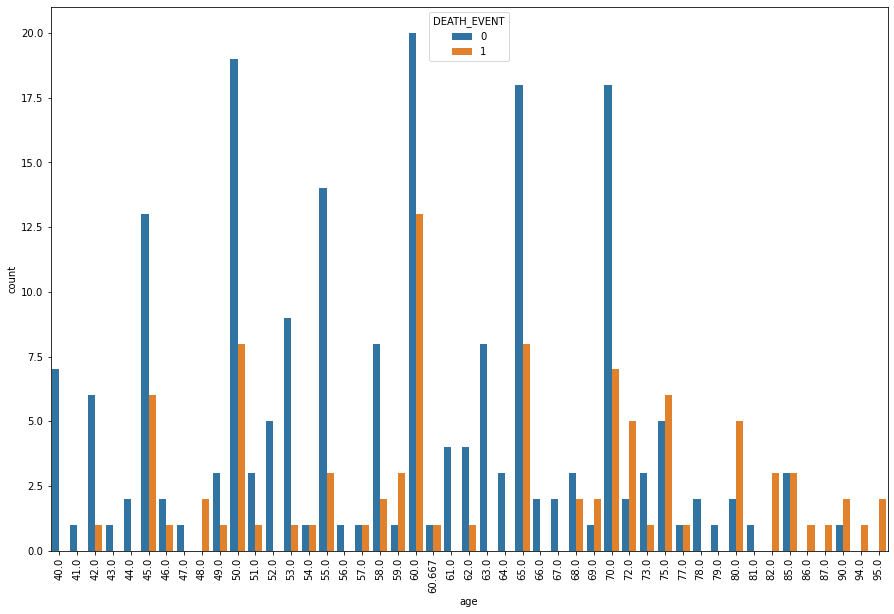

In [9]:
plt.rcParams['figure.figsize'] = (15,10)
sns.countplot(x = data.age, hue = data.DEATH_EVENT)
plt.xticks(rotation=90)

## Data Processing

In [10]:
X = data.drop('DEATH_EVENT', axis=1).values
Y = data.DEATH_EVENT.values

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.2, random_state=0)

## Model Building

Without Dropout

In [13]:
model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=100)

Epoch 1/100
8/8 [==============================] - 3s 33ms/step - loss: 0.6925 - accuracy: 0.6946 - val_loss: 0.6921 - val_accuracy: 0.6167
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.6946 - val_loss: 0.6911 - val_accuracy: 0.6167
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.6946 - val_loss: 0.6900 - val_accuracy: 0.6167
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.6946 - val_loss: 0.6887 - val_accuracy: 0.6167
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.6946 - val_loss: 0.6871 - val_accuracy: 0.6167
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.6946 - val_loss: 0.6849 - val_accuracy: 0.6167
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.6946 - val_loss: 0.6820 - val_accuracy: 0.6167
Epoch 8/100
8/8 [=========

Epoch 59/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8787 - val_loss: 0.5234 - val_accuracy: 0.7833
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.8787 - val_loss: 0.5241 - val_accuracy: 0.7833
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.8787 - val_loss: 0.5212 - val_accuracy: 0.7833
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.8787 - val_loss: 0.5209 - val_accuracy: 0.7833
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8787 - val_loss: 0.5214 - val_accuracy: 0.7833
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3643 - accuracy: 0.8787 - val_loss: 0.5226 - val_accuracy: 0.7833
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3634 - accuracy: 0.8787 - val_loss: 0.5218 - val_accuracy: 0.7833
Epoch 66/100
8/8 [==

In [15]:
history = pd.DataFrame(history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.692494,0.694561,0.692147,0.616667
1,0.690733,0.694561,0.691123,0.616667
2,0.688984,0.694561,0.690013,0.616667
3,0.687075,0.694561,0.688708,0.616667
4,0.684661,0.694561,0.687107,0.616667
...,...,...,...,...
95,0.329784,0.895397,0.510922,0.766667
96,0.328796,0.899582,0.511641,0.766667
97,0.327617,0.899582,0.513632,0.750000
98,0.326667,0.899582,0.511160,0.750000


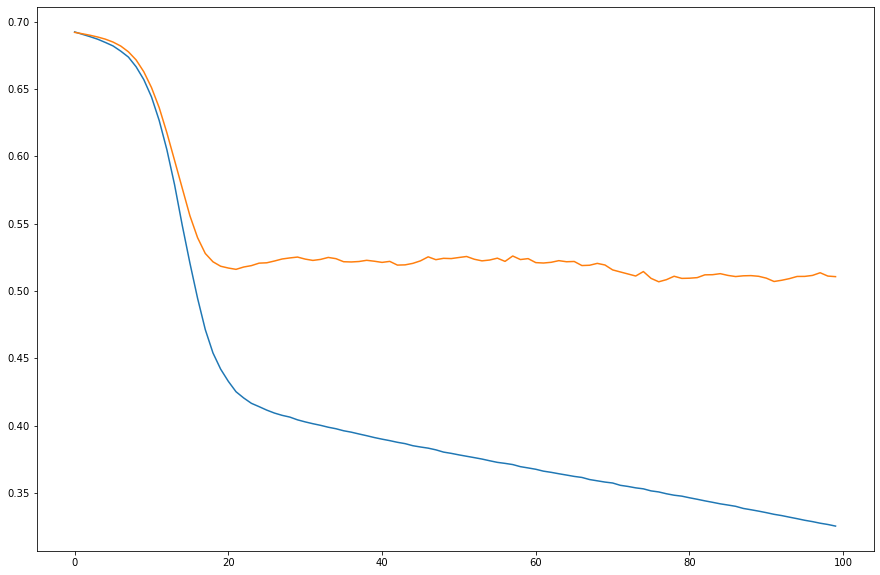

In [16]:
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.show()

In [17]:
model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 0.6925 - accuracy: 0.6778 - val_loss: 0.6923 - val_accuracy: 0.6167
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.6946 - val_loss: 0.6914 - val_accuracy: 0.6167
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.6946 - val_loss: 0.6906 - val_accuracy: 0.6167
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.6946 - val_loss: 0.6898 - val_accuracy: 0.6167
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.6946 - val_loss: 0.6890 - val_accuracy: 0.6167
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.6946 - val_loss: 0.6882 - val_accuracy: 0.6167
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.6946 - val_loss: 0.6875 - val_accuracy: 0.6167
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.6946 - val_loss: 0.6671 - val_accuracy: 0.6167
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6946 - val_loss: 0.6670 - val_accuracy: 0.6167
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6378 - accuracy: 0.6946 - val_loss: 0.6668 - val_accuracy: 0.6167
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6372 - accuracy: 0.6946 - val_loss: 0.6667 - val_accuracy: 0.6167
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.6946 - val_loss: 0.6666 - val_accuracy: 0.6167
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6362 - accuracy: 0.6946 - val_loss: 0.6665 - val_accuracy: 0.6167
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.6946 - val_loss: 0.6664 - val_accuracy: 0.6167
Epoch 66/100
8/8 [===============

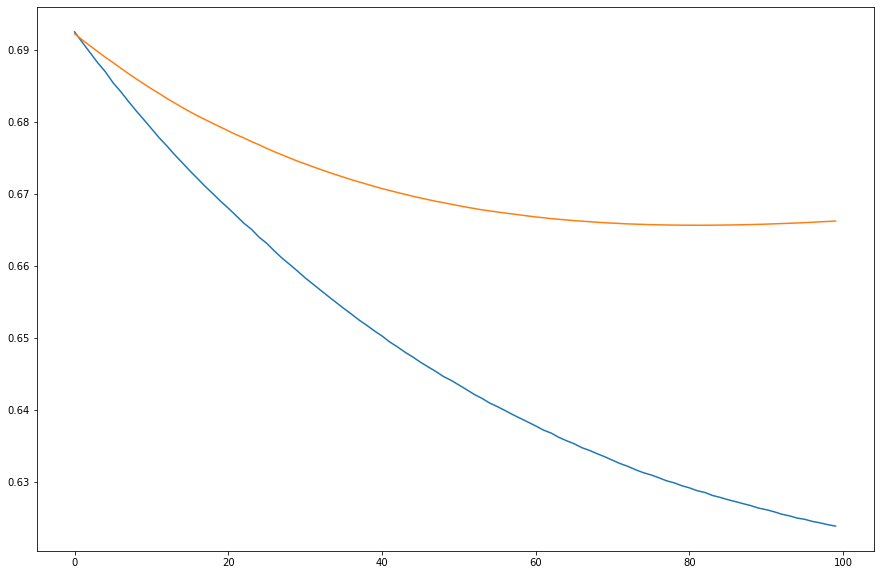

In [18]:
history = pd.DataFrame(history.history)
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.show()

In [19]:
model = Sequential()
model.add(Dense(units=16, kernel_initializer='glorot_uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 17ms/step - loss: 0.7438 - accuracy: 0.5858 - val_loss: 0.7056 - val_accuracy: 0.5333
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5941 - val_loss: 0.6927 - val_accuracy: 0.5167
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.6151 - val_loss: 0.6802 - val_accuracy: 0.5667
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.6527 - val_loss: 0.6726 - val_accuracy: 0.5667
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6734 - accuracy: 0.6862 - val_loss: 0.6662 - val_accuracy: 0.5833
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6527 - val_loss: 0.6600 - val_accuracy: 0.6000
Epoch 7/100
8/8 [==============================] - ETA: 0s - loss: 0.6231 - accuracy: 0.84 - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6695 - val_loss: 0.6541 - val_a

Epoch 59/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4228 - accuracy: 0.7490 - val_loss: 0.5806 - val_accuracy: 0.7000
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.7490 - val_loss: 0.5830 - val_accuracy: 0.7000
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4116 - accuracy: 0.7490 - val_loss: 0.5797 - val_accuracy: 0.7000
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4188 - accuracy: 0.7490 - val_loss: 0.5843 - val_accuracy: 0.7000
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4494 - accuracy: 0.7531 - val_loss: 0.5869 - val_accuracy: 0.7000
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.7866 - val_loss: 0.5858 - val_accuracy: 0.7167
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4205 - accuracy: 0.7782 - val_loss: 0.5865 - val_accuracy: 0.7167
Epoch 66/100
8/8 [==

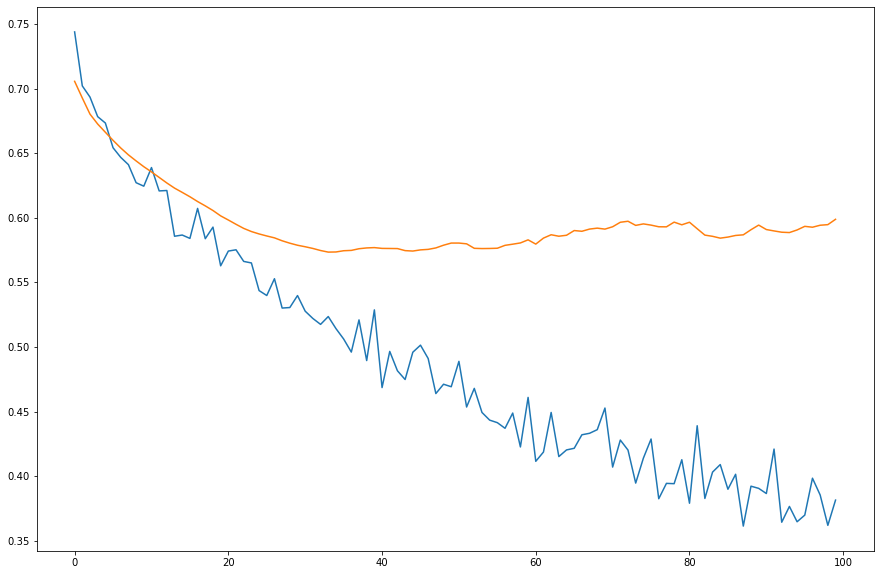

In [20]:
history = pd.DataFrame(history.history)
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.show()

In [21]:
history.loss.mean()

0.487967204451561

In [22]:
history.accuracy.mean()

0.7315899580717087

Epoch 1/100
8/8 [==============================] - 1s 18ms/step - loss: 0.7006 - accuracy: 0.5523 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.5314 - val_loss: 0.6910 - val_accuracy: 0.5833
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.4895 - val_loss: 0.6889 - val_accuracy: 0.6333
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.6192 - val_loss: 0.6872 - val_accuracy: 0.5833
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.6025 - val_loss: 0.6853 - val_accuracy: 0.5833
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6962 - accuracy: 0.5858 - val_loss: 0.6837 - val_accuracy: 0.5833
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.6444 - val_loss: 0.6823 - val_accuracy: 0.6167
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6987 - val_loss: 0.6629 - val_accuracy: 0.6167
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.6946 - val_loss: 0.6629 - val_accuracy: 0.6167
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6946 - val_loss: 0.6627 - val_accuracy: 0.6167
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.6987 - val_loss: 0.6628 - val_accuracy: 0.6167
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.6946 - val_loss: 0.6629 - val_accuracy: 0.6167
Epoch 64/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6205 - accuracy: 0.6904 - val_loss: 0.6631 - val_accuracy: 0.6167
Epoch 65/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6191 - accuracy: 0.6946 - val_loss: 0.6630 - val_accuracy: 0.6167
Epoch 66/100
8/8 [===============

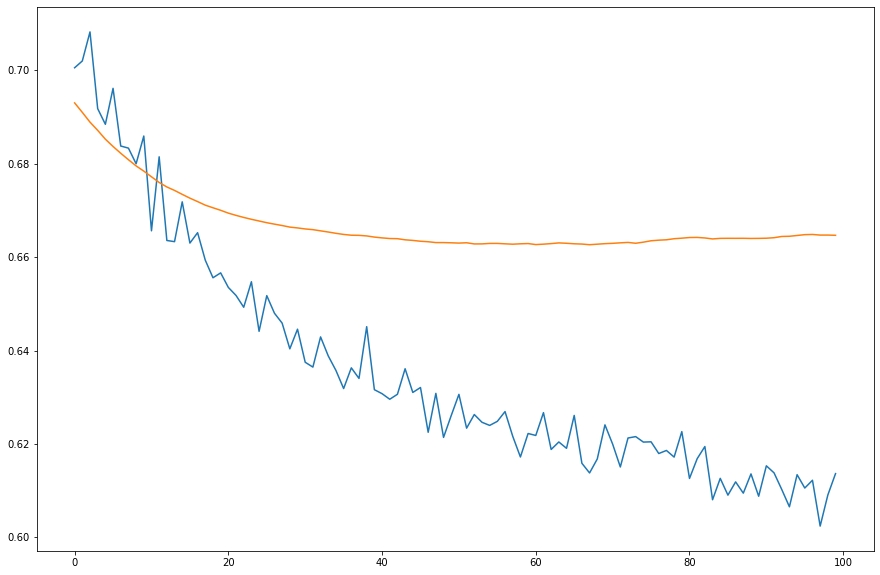

In [23]:
model = Sequential()
model.add(Dense(units=16, kernel_initializer='glorot_uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=100)
history = pd.DataFrame(history.history)
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.show()

In [24]:
history.accuracy.mean()

0.6842677730321884

Epoch 1/100
8/8 [==============================] - 1s 22ms/step - loss: 0.6541 - accuracy: 0.6862 - val_loss: 0.6612 - val_accuracy: 0.6500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.6402 - val_loss: 0.6606 - val_accuracy: 0.6500
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.6611 - val_loss: 0.6600 - val_accuracy: 0.6500
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6669 - accuracy: 0.6736 - val_loss: 0.6595 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.6653 - val_loss: 0.6591 - val_accuracy: 0.6500
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.6778 - val_loss: 0.6586 - val_accuracy: 0.6500
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6778 - val_loss: 0.6579 - val_accuracy: 0.6333
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6653 - val_loss: 0.6398 - val_accuracy: 0.6333
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6466 - accuracy: 0.6862 - val_loss: 0.6396 - val_accuracy: 0.6333
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6358 - accuracy: 0.6946 - val_loss: 0.6393 - val_accuracy: 0.6333
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6301 - accuracy: 0.7071 - val_loss: 0.6391 - val_accuracy: 0.6333
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6364 - accuracy: 0.6946 - val_loss: 0.6388 - val_accuracy: 0.6333
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6862 - val_loss: 0.6386 - val_accuracy: 0.6333
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.6862 - val_loss: 0.6383 - val_accuracy: 0.6333
Epoch 66/100
8/8 [===============

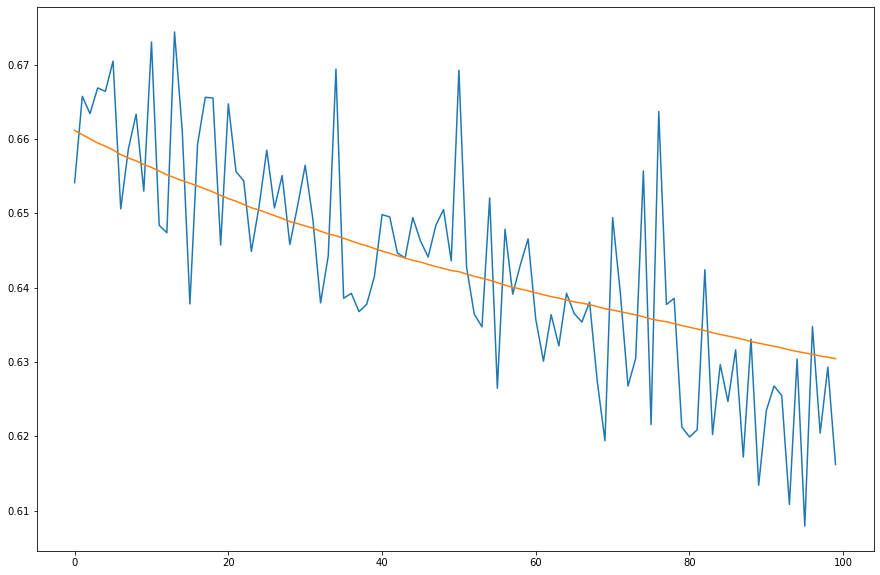

In [25]:
model = Sequential()
model.add(Dense(units=16, kernel_initializer='glorot_uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=100)
history = pd.DataFrame(history.history)
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.show()

In [26]:
history.accuracy.mean()

0.691841002702713